OBJECTIVE: The "Default Predictor

We  will use a real-world dataset that UCI Credit Approval Dataset. 
It is anonymized but reflects real banking decisions:

Checking/Savings account status (Financial health)

Credit History (Past behavior—critical for an Auditor!)

Purpose of the loan (Business vs. Personal)

Employment status (Stability)
                
To predict: If we give this person a loan, what is the probability they will not pay it back?           

In [2]:
import pandas as pd

# Load the German Credit Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric"
columns = [f'Stat_{i}' for i in range(24)] + ['Target'] 
df_credit = pd.read_csv(url, sep='\s+', names=columns)

# Standardize Target: 0 = Safe, 1 = High Risk (Bad)
df_credit['Target'] = df_credit['Target'].replace({1: 0, 2: 1})

print("Variable 'df_credit' is now defined. Shape:", df_credit.shape)

Variable 'df_credit' is now defined. Shape: (1000, 25)


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load a classic Credit Risk Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric"
columns = [f'Stat_{i}' for i in range(24)] + ['Target'] # 24 financial features
df_credit = pd.read_csv(url, sep='\s+', names=columns)

# In this dataset: 1 = Good Credit, 2 = Bad Credit (Risk)
# Let's make it intuitive: 0 = Safe, 1 = High Risk
df_credit['Target'] = df_credit['Target'].replace({1: 0, 2: 1})

print("Dataset Shape:", df_credit.shape)
print(df_credit['Target'].value_counts(normalize=True))

Dataset Shape: (1000, 25)
Target
0    0.7
1    0.3
Name: proportion, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_18616\3208542706.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Target', data=df_credit, palette='viridis')


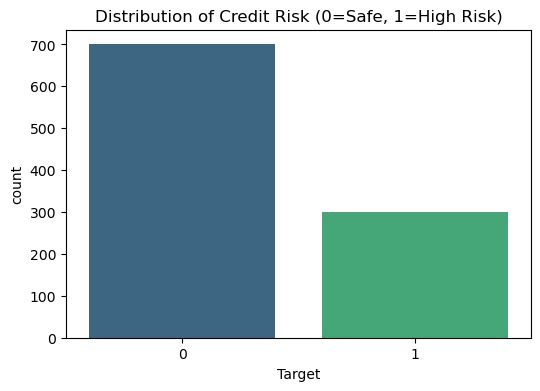

In [11]:
# To see Risk Distribution

plt.figure(figsize=(6,4))
sns.countplot(x='Target', data=df_credit, palette='viridis')
plt.title('Distribution of Credit Risk (0=Safe, 1=High Risk)')
plt.savefig('Distribution of Credit Risk_png', dpi=300, bbox_inches='tight')
plt.show()

In [5]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [6]:
# he "Default Predictor" Implementation

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Prepare Features (X) and Target (y)
X = df_credit.drop('Target', axis=1)
y = df_credit['Target']

# 2. Split into Training and Testing sets (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Apply SMOTE to BALANCE the training data
# This creates "synthetic" examples of bad loans so the model learns their patterns
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print(f"Before SMOTE: {y_train.value_counts().to_dict()}")
print(f"After SMOTE: {y_train_res.value_counts().to_dict()}")

# 4. Train the "Audit-Ready" Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_res, y_train_res)

# 5. Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

Before SMOTE: {0: 491, 1: 209}
After SMOTE: {0: 491, 1: 491}
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       209
           1       0.62      0.54      0.58        91

    accuracy                           0.76       300
   macro avg       0.72      0.70      0.70       300
weighted avg       0.75      0.76      0.75       300



Why this Analysis:
SMOTE (Synthetic Data): Instead of just duplicating old "Bad" loan records, SMOTE looks at the 
characteristics of existing defaulters and creates new, realistic examples. This prevents 
the model from just "memorizing" the data (overfitting).

Focus on "Recall": In credit risk, Recall is your most important metric. It tells you: 
"Of all the people who actually defaulted, what percentage did my model catch?".

The Random Forest "Audit Trail": We use Random Forest because it doesn't just give a "Yes/No". 
It allows us to pull "Feature Importance," showing that factors like "Checking Account Status" 
or "Duration of Loan" were the biggest red flags.

The Feature Map
Here are the most significant "Stat" IDs and what they actually mean in a banking context:

Stat_0: Status of existing checking account (e.g., balance levels).

Stat_1: Duration of the loan in months.

Stat_2: Credit history (e.g., past delays or critical accounts).

Stat_4: Credit amount requested.

Stat_12: Age of the applicant in years.

C:\Users\user\AppData\Local\Temp\ipykernel_18616\1983804975.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature_Label', data=fi_df.head(5), palette='magma')


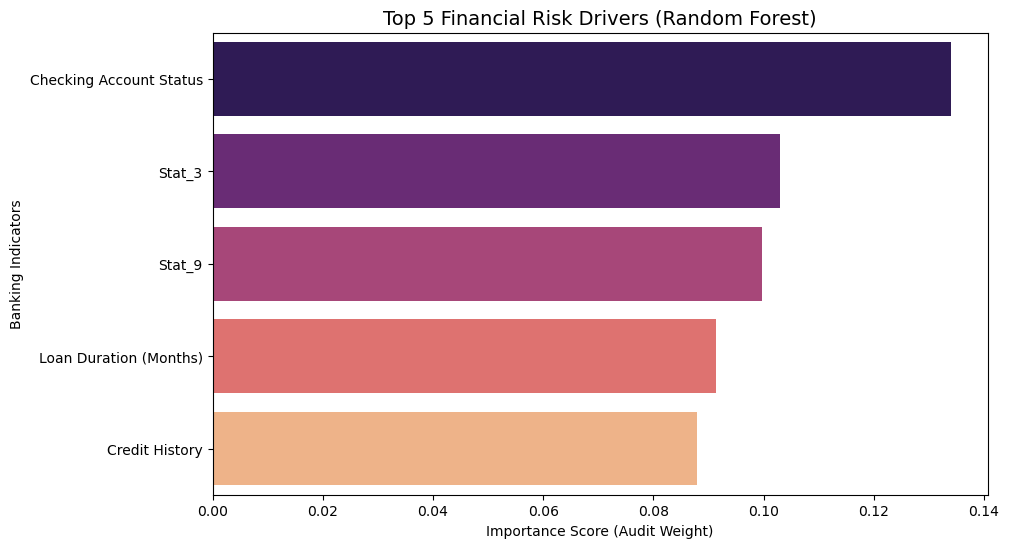

In [12]:
# Updating  Plot with Labels

# 1. Define the mapping dictionary
feature_map = {
    'Stat_0': 'Checking Account Status',
    'Stat_1': 'Loan Duration (Months)',
    'Stat_2': 'Credit History',
    'Stat_4': 'Credit Amount',
    'Stat_7': 'Installment Rate',
    'Stat_12': 'Age',
    'Stat_15': 'Existing Credits at Bank'
}

# 2. Map the names in your Importance DataFrame
fi_df['Feature_Label'] = fi_df['Feature'].map(feature_map).fillna(fi_df['Feature'])

# 3. Plot with readable labels
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature_Label', data=fi_df.head(5), palette='magma')
plt.title('Top 5 Financial Risk Drivers (Random Forest)', fontsize=14)
plt.xlabel('Importance Score (Audit Weight)')
plt.ylabel('Banking Indicators')
plt.savefig('risk_drivers_png', dpi=300, bbox_inches='tight')
plt.show()

Checking Account Status: This is the most powerful predictor of default. It tells the bank if the person already has a stable financial cushion.

Loan Duration: Usually, the longer the loan term, the higher the risk of something going wrong in the borrower's life.

In [13]:
# You want to create a Credit Risk Scorecard function in Python. This function will simulate how modern Nigerian 
# FinTechs like Carbon or FairMoney automate lending decisions by turning a model's "probability" into a user-friendly score (e.g., 0 to 800).

# The "Risk Scorecard" Logic
# In professional lending, we don't just say "Good" or "Bad." We calculate a Credit Score where a higher number represents lower risk.

# Model Output: A probability between 0 and 1 (where 1 is High Risk).

# Transformation: We flip this so that 0 is "Bad" and 1000 is "Perfect"

In [14]:
# Building the Scorecard Function

def calculate_credit_score(probability_of_default):
    """
    Transforms a 0-1 probability into a 300-1000 Credit Score.
    Higher Score = Lower Risk.
    """
    # 0 probability (Safe) becomes 1000 points
    # 1 probability (High Risk) becomes 300 points
    base_score = 1000
    penalty = probability_of_default * 700
    final_score = base_score - penalty
    
    return round(final_score)

# --- Test it on your Test Set ---
# Get the probabilities for the 'Risk' class (column 1)
test_probabilities = model.predict_proba(X_test)[:, 1]

# Apply the function to the first 5 people in the test set
for i in range(5):
    prob = test_probabilities[i]
    score = calculate_credit_score(prob)
    status = "APPROVED" if score > 700 else "REJECTED"
    print(f"Customer {i+1}: Prob of Default: {prob:.2f} | Credit Score: {score} | Decision: {status}")

Customer 1: Prob of Default: 0.71 | Credit Score: 503 | Decision: REJECTED
Customer 2: Prob of Default: 0.40 | Credit Score: 720 | Decision: APPROVED
Customer 3: Prob of Default: 0.81 | Credit Score: 433 | Decision: REJECTED
Customer 4: Prob of Default: 0.54 | Credit Score: 622 | Decision: REJECTED
Customer 5: Prob of Default: 0.08 | Credit Score: 944 | Decision: APPROVED


Why this is "FinTech" Level Work:
Probability vs. Decision: You aren't just using the default 0.5 threshold. By creating a Scorecard, 
you can set your own "Appetite for Risk". For example, during a recession, you might only approve people with scores over 850.

Risk-Based Pricing: In a real Nigerian bank, a person with a score of 900 might get a 15% interest rate, 
while someone with 750 gets 25% to cover the higher risk.

Alternative Data Integration: While we used standard banking data, platforms like FairMoney often 
include "Digital Footprints" (like phone usage patterns) to build these scores for people without traditional bank accounts.